In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Lahari\noumi-1\Back_End\Database\synthetic_transactions_50001.csv") 
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                         transaction_id                            account_id  \
0  7338b3c0-e23b-4d82-893b-89e4065f2199  d767be57-9841-4010-a059-35fafef2713c   
1  67978c29-7e7b-47aa-841d-2345b3016c97  df505d3f-7f2d-47a2-887a-ff497b378af4   
2  bb2fc643-76a4-46f0-8767-c6841827d017  ec058405-3dd7-4717-8386-12804d2a813b   
3  2c68faea-9493-4ddb-8d7a-eff9a66874fa  133c9fad-3371-4198-9aff-628ba1e89186   
4  748ef7da-ada5-4b3b-b5e1-aad1933a7c40  5acc472f-c4bd-4121-8273-7946c8e8929d   

   amount        date merchant_name                           category  \
0  197.04  2024-01-20         Shell         ['Travel', 'Gas Stations']   
1  212.93  2024-05-25         Shell         ['Travel', 'Gas Stations']   
2   32.98  2024-05-15  CVS Pharmacy             ['Health', 'Pharmacy']   
3  392.14  2024-05-14     Starbucks  ['Food and Drink', 'Coffee Shop']   
4  221.79  2023-11-05     Starbucks  ['Food and Drink', 'Coffee Shop']   

             description   mcc  
0     

In [3]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  50000 non-null  object 
 1   account_id      50000 non-null  object 
 2   amount          50000 non-null  float64
 3   date            50000 non-null  object 
 4   merchant_name   50000 non-null  object 
 5   category        50000 non-null  object 
 6   description     50000 non-null  object 
 7   mcc             50000 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB
None


In [4]:
# Summary statistics
print("\n Summary Statistics:")
print(df.describe())


 Summary Statistics:
             amount           mcc
count  50000.000000  50000.000000
mean     251.755876   5476.693480
std      143.647928    498.874582
min        2.510000   4121.000000
25%      127.830000   5311.000000
50%      251.070000   5541.000000
75%      377.410000   5814.000000
max      500.000000   5912.000000


In [5]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
transaction_id    0
account_id        0
amount            0
date              0
merchant_name     0
category          0
description       0
mcc               0
dtype: int64


In [6]:
# Check for duplicate rows
print("\n Duplicate Rows:", df.duplicated().sum())


 Duplicate Rows: 0


In [7]:
# Check unique categories
print("\n Unique Categories:")
print(df['category'].value_counts())


 Unique Categories:
category
['Travel', 'Gas Stations']           5164
['Shops', 'Wholesale Clubs']         5105
['Tech', 'Electronics']              5037
['Health', 'Pharmacy']               5012
['Shops', 'Supermarkets']            4982
['Travel', 'Ride Sharing']           4973
['Shops', 'Department Stores']       4955
['Food and Drink', 'Restaurants']    4951
['Food and Drink', 'Coffee Shop']    4927
['Shops', 'Online']                  4894
Name: count, dtype: int64


In [8]:
# Check unique merchants
print("\n Top 10 Merchants by Frequency:")
print(df['merchant_name'].value_counts().head(10))


 Top 10 Merchants by Frequency:
merchant_name
Shell           5164
Costco          5105
Apple           5037
CVS Pharmacy    5012
Walmart         4982
Uber            4973
Target          4955
McDonald's      4951
Starbucks       4927
Amazon          4894
Name: count, dtype: int64


In [9]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

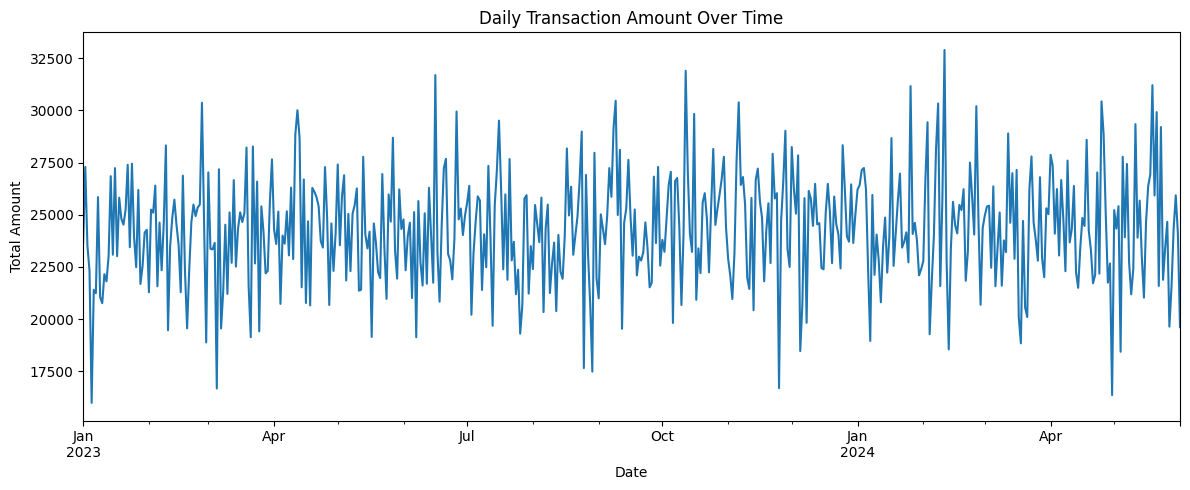

In [10]:
# Plotting transaction amounts over time
plt.figure(figsize=(12, 5))
df.set_index('date')['amount'].resample('D').sum().plot()
plt.title("Daily Transaction Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

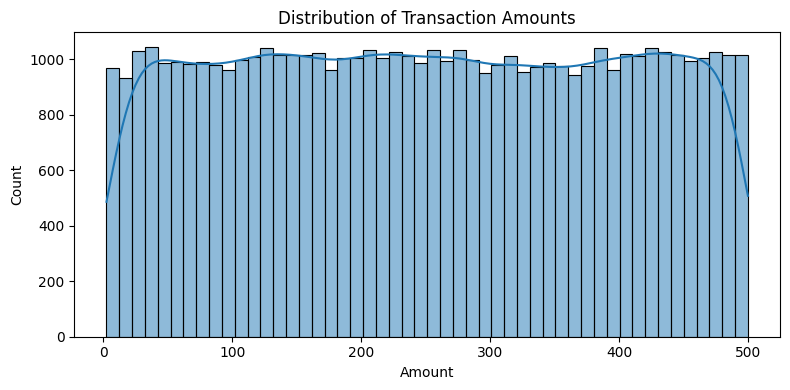

In [11]:
# Distribution of transaction amounts
plt.figure(figsize=(8, 4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.tight_layout()
plt.show()

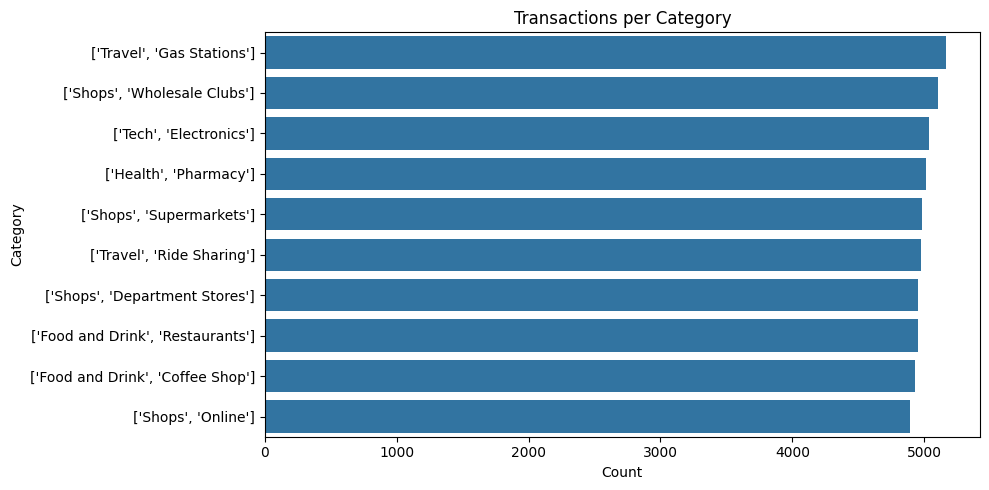

In [12]:
# Transaction count per category
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title("Transactions per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

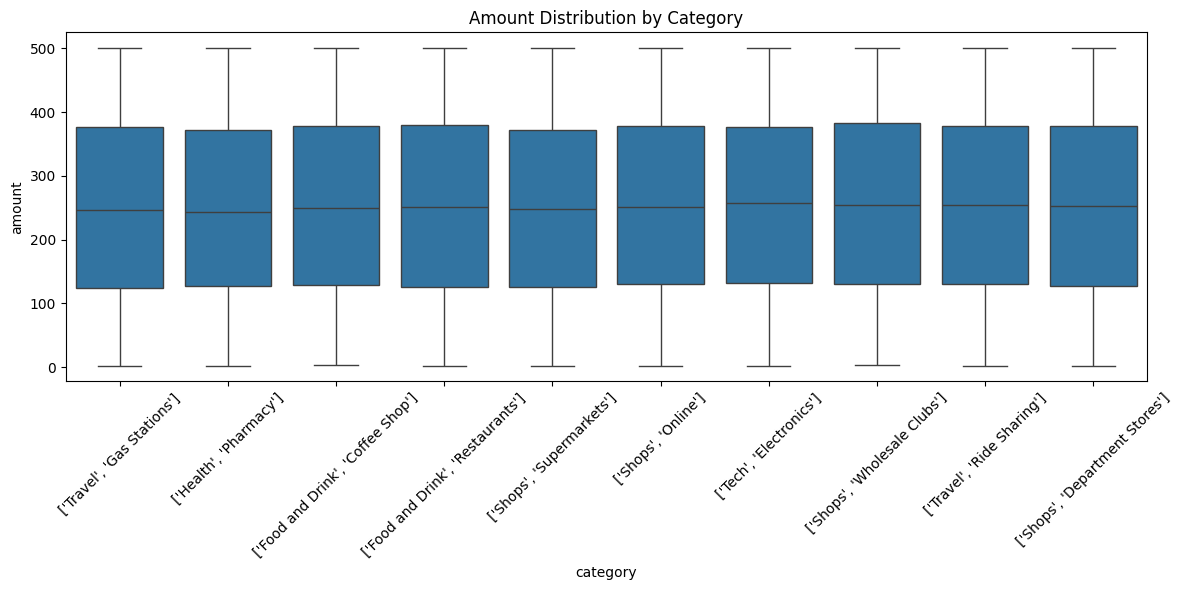

In [13]:
# Boxplot of transaction amount by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amount', data=df)
plt.xticks(rotation=45)
plt.title("Amount Distribution by Category")
plt.tight_layout()
plt.show()

In [14]:
# MCC code analysis
print("\nMCC code frequency:")
print(df['mcc'].value_counts().head(10))


MCC code frequency:
mcc
5541    5164
5300    5105
5732    5037
5912    5012
5411    4982
4121    4973
5311    4955
5812    4951
5814    4927
5818    4894
Name: count, dtype: int64


In [15]:
# 1.Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [16]:
# 2.Sort data by account_id and date
df.sort_values(by=['account_id', 'date'], inplace=True)

In [17]:
# 3.Feature Engineering

# Extract day of week
df['day_of_week'] = df['date'].dt.day_name()

#  Flag weekends
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Rolling 7-day spend per user
df['rolling_spend_7d'] = (
    df.groupby('account_id')['amount']
    .rolling(window=7, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)

# Time since last transaction (in days)
df['prev_date'] = df.groupby('account_id')['date'].shift(1)
df['days_since_prev'] = (df['date'] - df['prev_date']).dt.days.fillna(0)

df['amount_zscore'] = (
    df.groupby('account_id')['amount']
    .transform(lambda x: (x - x.mean()) / x.std(ddof=0))
)

In [18]:
# 4. Drop unnecessary columns
df.drop(columns=['transaction_id', 'description', 'mcc', 'prev_date'], inplace=True)

In [19]:
# 5. Flatten 'category' into primary category
df['primary_category'] = df['category'].str.extract(r"\['(.*?)'")
df.drop(columns=['category'], inplace=True)

In [20]:
# 6. Encode categorical variables
df = pd.get_dummies(df, columns=['day_of_week', 'primary_category'])

In [21]:
# 7. Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['amount', 'rolling_spend_7d', 'days_since_prev', 'amount_zscore']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [22]:
df.to_csv("processed_50000_for_lstm.csv", index=False)

print("LSTM preprocessing complete and saved as 'processed_50000_for_lstm.csv'")

LSTM preprocessing complete and saved as 'processed_50000_for_lstm.csv'
